<a href="https://colab.research.google.com/github/nkefeyan-22-26/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Lab%202%3A%20Deflating%20History%20with%20FRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fredapi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred

In [4]:
fred = Fred(api_key='=')

In [5]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI') # total production index (wage paid to workers who produce products - this is the nominal wage)
cpi = fred.get_series('CPIAUCSL') # inflation

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [8]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


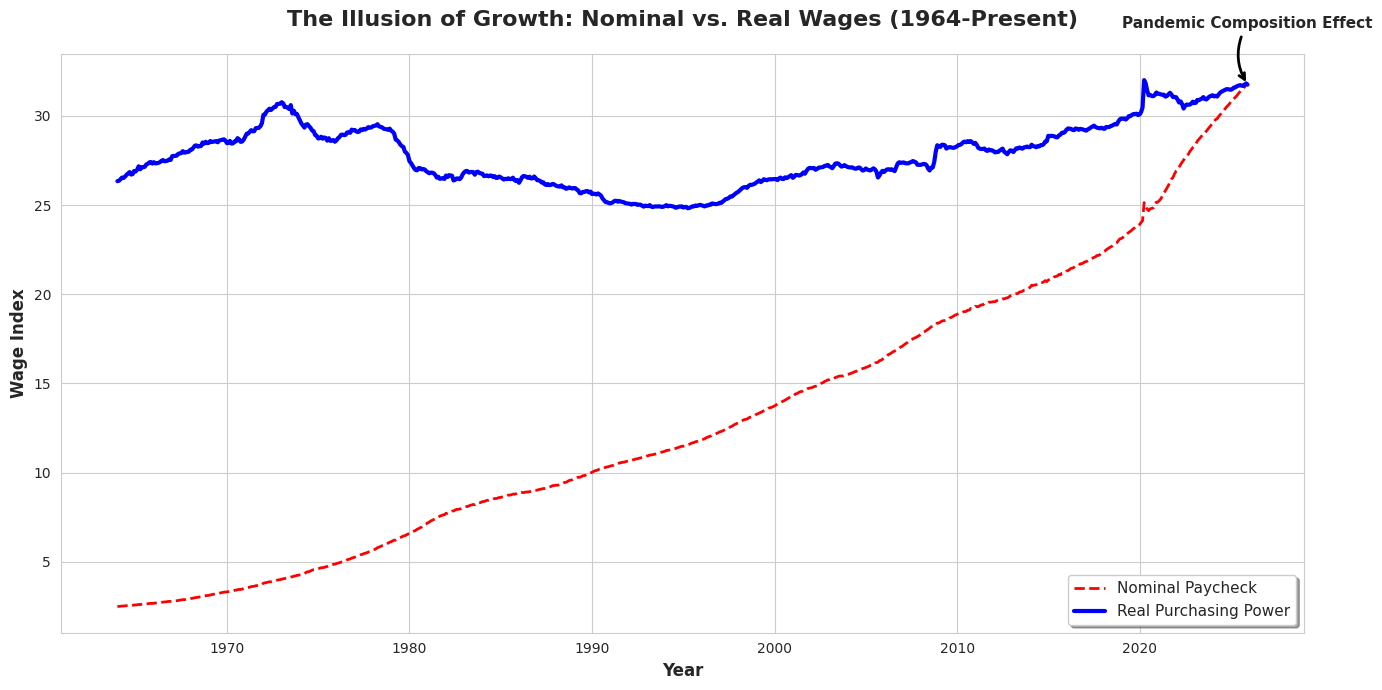

In [9]:
# Set the style
sns.set_style("whitegrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the wage lines
ax.plot(df.index, df['Nominal_Wage'],
        color='red',
        linestyle='--',
        linewidth=2,
        label='Nominal Paycheck')

ax.plot(df.index, df['Real_Wage'],
        color='blue',
        linewidth=3,
        label='Real Purchasing Power')

# Add title and labels
ax.set_title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Wage Index', fontsize=12, fontweight='bold')

# Add annotation for 2020 pandemic spike
# Find the 2020 data point
spike_date = df.loc['2020'].index[0] if '2020' in df.index.astype(str) else df.index[-1]
spike_value = df.loc[spike_date, 'Real_Wage']

ax.annotate('Pandemic Composition Effect',
            xy=(spike_date, spike_value),
            xytext=(spike_date, spike_value * 1.1),
            fontsize=11,
            fontweight='bold',
            ha='center',
            arrowprops=dict(arrowstyle='->',
                          connectionstyle='arc3,rad=0.3',
                          color='black',
                          lw=2))

# Add legend
ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)

# Improve layout
plt.tight_layout()
plt.show()

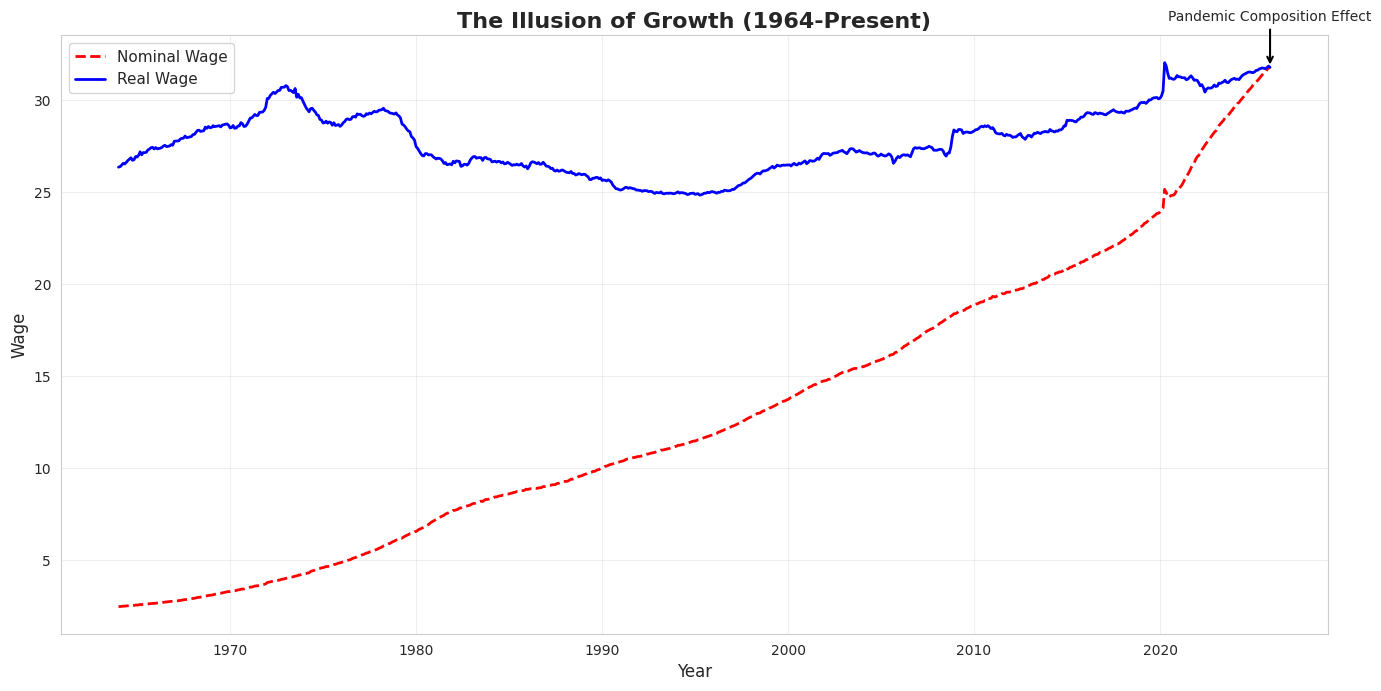

In [11]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the wage lines
ax.plot(df.index, df['Nominal_Wage'],
        color='red',
        linestyle='--',
        linewidth=2,
        label='Nominal Wage')

ax.plot(df.index, df['Real_Wage'],
        color='blue',
        linewidth=2,
        label='Real Wage')

# Add title and labels
ax.set_title('The Illusion of Growth (1964-Present)',
             fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Wage', fontsize=12)

# Add annotation for 2020 pandemic spike
# Find the 2020 data point
spike_date = df.loc['2020'].index[0] if '2020' in df.index.astype(str) else df.index[-1]
spike_value = df.loc[spike_date, 'Real_Wage']

ax.annotate('Pandemic Composition Effect',
            xy=(spike_date, spike_value),
            xytext=(spike_date, spike_value * 1.08),
            fontsize=10,
            ha='center',
            arrowprops=dict(arrowstyle='->',
                          color='black',
                          lw=1.5))

# Add legend
ax.legend(loc='best', fontsize=11)

# Add grid
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

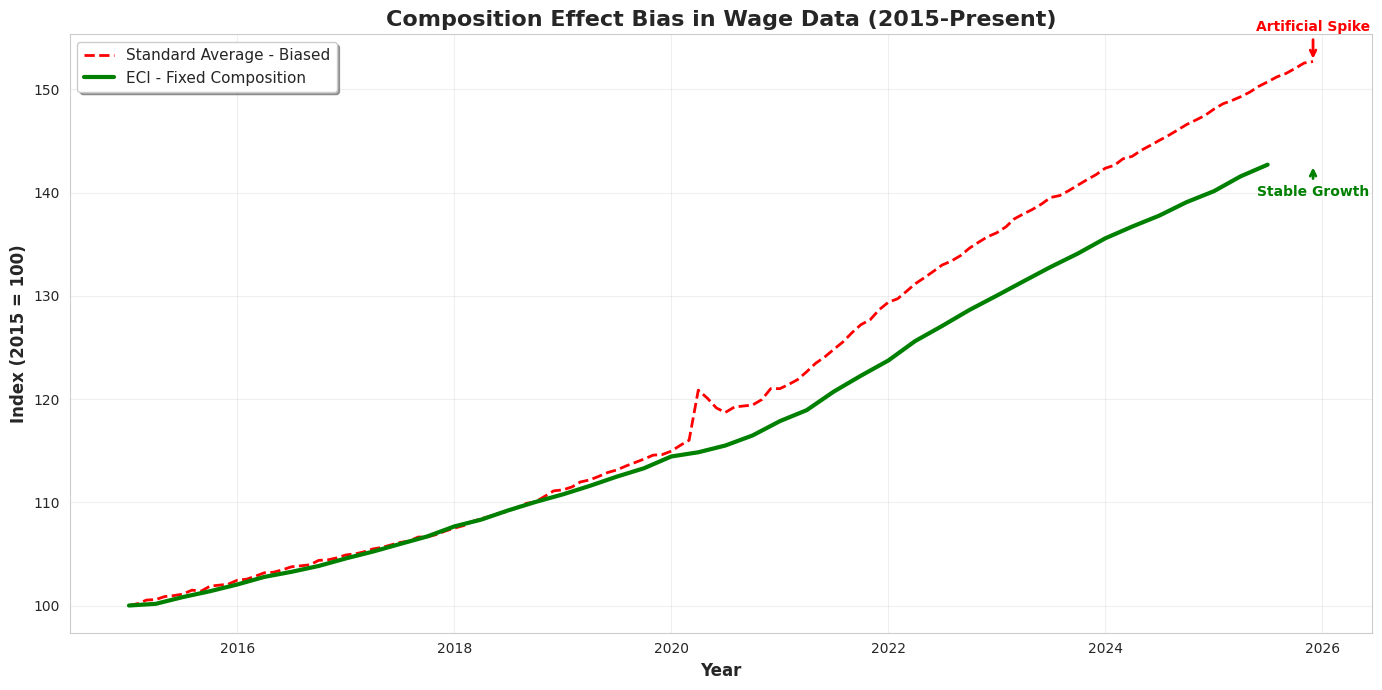


2020 Divergence Analysis:
Standard Wages (2020): 152.69
ECI Wages (2020): 142.70
Artificial Inflation: 9.99 points


In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Fetch the Employment Cost Index data
eci = fred.get_series('ECIWAG')

# 2. Filter both series to 2015-01-01 onwards
start_date = '2015-01-01'
wages_filtered = wages[wages.index >= start_date]
eci_filtered = eci[eci.index >= start_date]

# 3. Rebase both series to 100 (using first value)
wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
eci_rebased = (eci_filtered / eci_filtered.iloc[0]) * 100

# 4. Create the comparison chart
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both series
ax.plot(wages_rebased.index, wages_rebased,
        color='red',
        linestyle='--',
        linewidth=2,
        label='Standard Average - Biased')

ax.plot(eci_rebased.index, eci_rebased,
        color='green',
        linewidth=3,
        label='ECI - Fixed Composition')

# Add title and labels
ax.set_title('Composition Effect Bias in Wage Data (2015-Present)',
             fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Index (2015 = 100)', fontsize=12, fontweight='bold')

# 5. Annotate the 2020 divergence
# Find 2020 data points
wages_2020 = wages_rebased.loc['2020'].iloc[-1] if '2020' in wages_rebased.index.astype(str) else wages_rebased.iloc[-1]
eci_2020 = eci_rebased.loc['2020'].iloc[-1] if '2020' in eci_rebased.index.astype(str) else eci_rebased.iloc[-1]
date_2020 = wages_rebased.loc['2020'].index[-1] if '2020' in wages_rebased.index.astype(str) else wages_rebased.index[-1]

# Annotate the artificial spike in standard wages
ax.annotate('Artificial Spike',
            xy=(date_2020, wages_2020),
            xytext=(date_2020, wages_2020 + 3),
            fontsize=10,
            fontweight='bold',
            color='red',
            ha='center',
            arrowprops=dict(arrowstyle='->',
                          color='red',
                          lw=2))

# Annotate the stable growth in ECI
ax.annotate('Stable Growth',
            xy=(date_2020, eci_2020),
            xytext=(date_2020, eci_2020 - 3),
            fontsize=10,
            fontweight='bold',
            color='green',
            ha='center',
            arrowprops=dict(arrowstyle='->',
                          color='green',
                          lw=2))

# Add legend and grid
ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n2020 Divergence Analysis:")
print(f"Standard Wages (2020): {wages_2020:.2f}")
print(f"ECI Wages (2020): {eci_2020:.2f}")
print(f"Artificial Inflation: {wages_2020 - eci_2020:.2f} points")